In [3]:
%%python - "/Users/rafaelapb/Projects/test/example.csv" arg2

import sys

if __name__ == '__main__':
    print(sys.argv)

event_log_path = sys.argv[1]

# import sys

# accept command line arguments
# inputArg1 = sys.argv[1]

#print('inputArg1: ',inputArg1)


['-', '/Users/rafaelapb/Projects/test/example.csv', 'arg2']


In [4]:
import pm4py
import datetime as dt
import pandas

# process mining
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

from pm4py.objects.conversion.process_tree import converter as pt_converter



ModuleNotFoundError: No module named 'pm4py'

In [34]:
def import_csv_original(file_path):
    event_log = pandas.read_csv(file_path, sep=';')
    event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
    return event_log

def getStartActivities(event_log):
    s = pm4py.get_start_activities(event_log)
    print("Start activities: {}\n".format(s))
    return s
def getEndActivities(event_log):
    e = pm4py.get_end_activities(event_log)
    print("End activities: {}\n".format(e))
    return (e)

def getAttributeFromLog(event_log, attr):
    entries = pm4py.get_event_attribute_values(event_log,attr)
    print("Entries: {}\n".format(entries))
    return entries

In [42]:
print(sys.argv)
%%python - "/Users/rafaelapb/Projects/test/example.csv" arg2
print(sys.argv)
log = import_csv_original("/Users/rafaelapb/Projects/test/example.csv")
print(len(log))
startAct = getStartActivities(log)
endAct = getEndActivities(log)
timestamps = getAttributeFromLog(log, "timestamp")



['/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/ipykernel_launcher.py', '-f', '/Users/rafaelapb/Library/Jupyter/runtime/kernel-f06dae74-dfa9-4ae0-93a4-14fbc6268494.json']


UsageError: Line magic function `%%python` not found.


In [36]:
filtered = pm4py.filter_event_attribute_values(log, 'resource', {'Pete', 'Mike'})
print(filtered)

    case_id            activity                 timestamp  costs resource  \
14        1    register request 2010-12-30 10:02:00+00:00     50     Pete   
15        1  examine thoroughly 2010-12-31 09:06:00+00:00    400      Sue   
16        1        check ticket 2011-01-05 14:12:00+00:00    100     Mike   
17        1              decide 2011-01-06 10:18:00+00:00    200     Sara   
18        1      reject request 2011-01-07 13:24:00+00:00    200     Pete   
9         2    register request 2010-12-30 10:32:00+00:00     50     Mike   
10        2        check ticket 2010-12-30 11:12:00+00:00    100     Mike   
11        2    examine casually 2010-12-30 13:16:00+00:00    400     Sean   
12        2              decide 2011-01-05 10:22:00+00:00    200     Sara   
13        2    pay compensation 2011-01-08 11:05:00+00:00    200    Ellen   
0         3    register request 2010-12-30 13:32:00+00:00     50     Pete   
1         3    examine casually 2010-12-30 14:06:00+00:00    400     Mike   

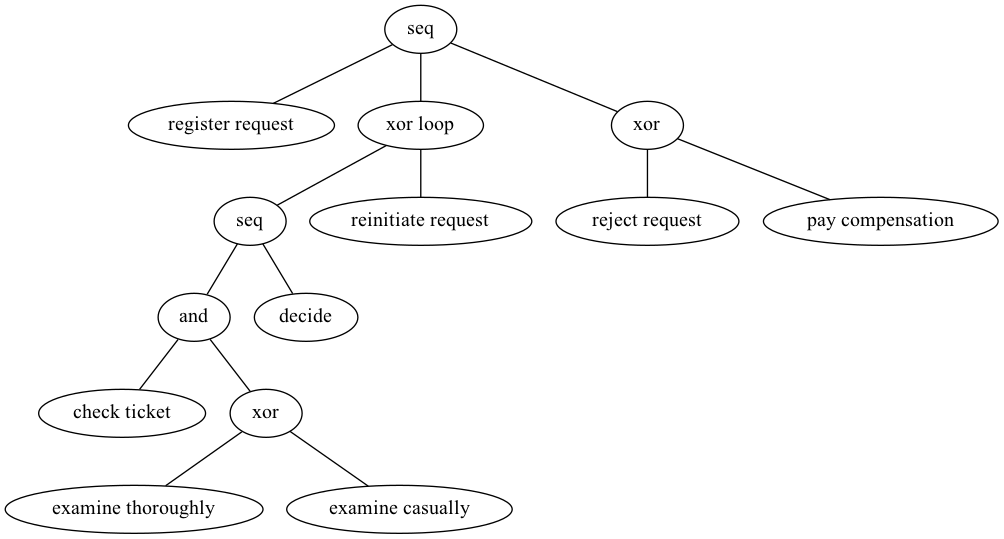

/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
replaying log with TBR, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 1985.31it/s]


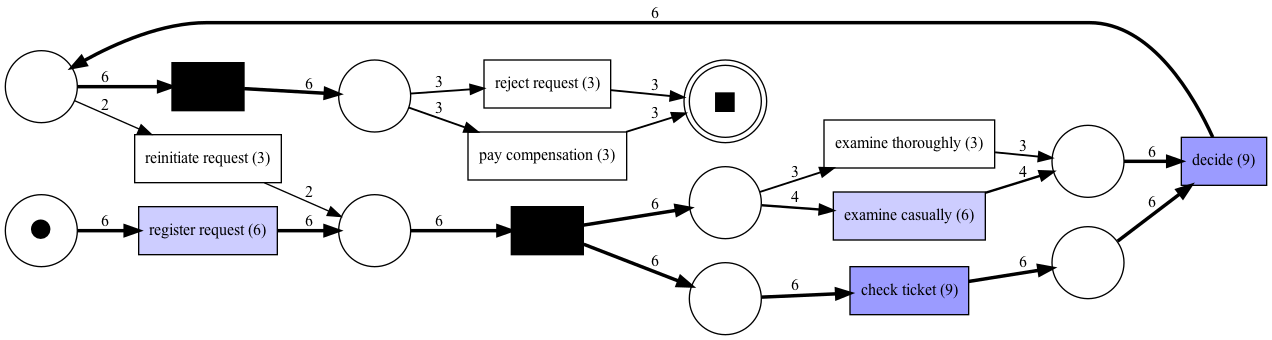

In [37]:
# create the process tree
tree = inductive_miner.apply_tree(log)

# viz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)# convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)

In [38]:
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

NameError: name 'process_tree' is not defined

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

map = pm4py.discover_heuristics_net(log)
pm4py.view_heuristics_net(map)

In [ ]:
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz petri net
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}

gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]
/Users/rafaelapb/.conda/envs/cctx/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


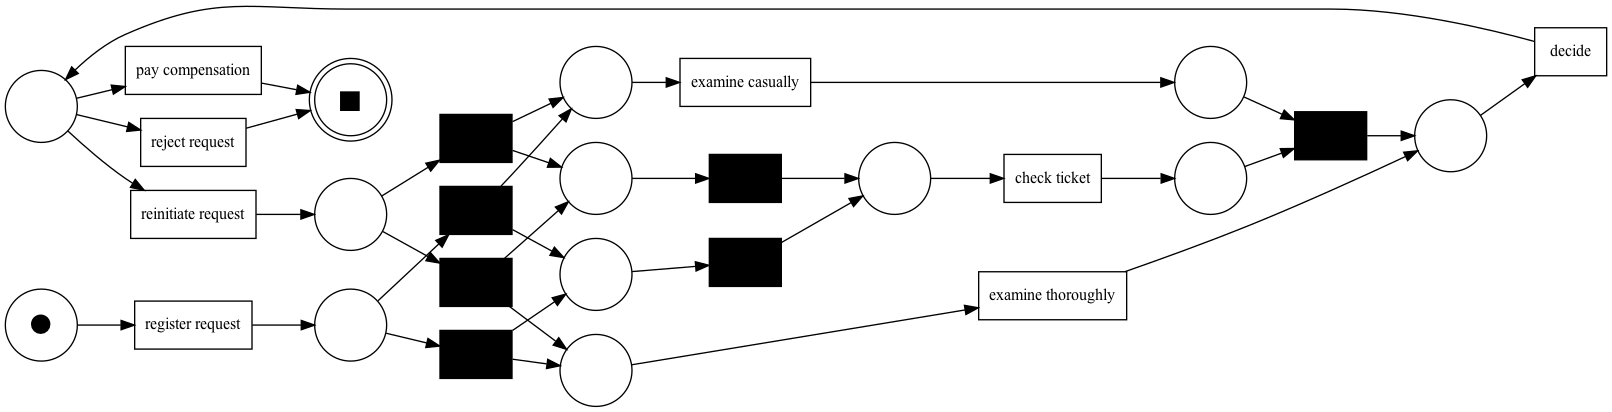

In [43]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)